## LSTM

In [1]:
import pandas as pd
from google.colab import drive


drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
data_APT = pd.read_csv('/content/drive/MyDrive/Ultimate_Data/data_APT.csv', encoding='utf-8')
data_APT.info()
data_APT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93453 entries, 0 to 93452
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Building_Age                     93453 non-null  int64  
 1   JS_Price                         93453 non-null  int64  
 2   JS_BA                            93453 non-null  float64
 3   Population                       93453 non-null  int64  
 4   LC_index                         93453 non-null  float64
 5   TC_index                         93453 non-null  float64
 6   SDT_index                        93453 non-null  float64
 7   Sell_Price                       93453 non-null  float64
 8   Crime_Rates                      93453 non-null  float64
 9   IR                               93453 non-null  float64
 10  Region_강남구                       93453 non-null  int64  
 11  Region_강동구                       93453 non-null  int64  
 12  Region_강북구        

,Building_Age,JS_Price,JS_BA,Population,LC_index,TC_index,SDT_index,Sell_Price,Crime_Rates,IR,...,Region_용산구,Region_은평구,Region_종로구,Region_중구,Region_중랑구,Year,Month,Shortest_Distance_to_Subway,Shortest_Distance_to_University,Shortest_Distance_to_School
0,15,18000,59.97,299533,72.000000,74.200000,114.099327,31400.00,0.930480,2.75,...,0,0,0,0,0,2011,1,744.388888,1783.606149,370.003165
1,32,30000,84.43,557563,72.000000,74.200000,113.009872,100404.17,0.842083,2.75,...,0,0,0,0,0,2011,1,839.698707,3723.160551,336.123079
2,14,22000,59.82,368260,72.000000,74.200000,113.009872,56836.67,0.836749,2.75,...,0,0,0,0,0,2011,1,351.857009,1517.638732,470.686016
3,25,18000,47.94,494724,72.000000,74.200000,114.099106,82850.00,0.943467,2.75,...,0,0,0,0,0,2011,1,907.582994,3053.953581,180.644334
4,12,23500,149.97,420803,72.000000,74.200000,114.270256,34030.00,0.854310,2.75,...,0,0,0,0,0,2011,1,248.141179,718.700972,318.836190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93448,26,45000,84.20,384272,102.715637,100.768990,132.138962,54000.00,0.779744,3.50,...,0,0,0,0,1,2023,9,255.627811,1952.815142,188.219471
93449,13,40000,59.60,291384,102.715637,100.768990,132.138962,107500.00,0.779744,3.50,...,0,0,0,0,0,2023,9,891.504266,658.072434,238.994104
93450,24,45000,59.97,121441,102.715637,100.768990,132.138962,125000.00,0.779744,3.50,...,0,0,0,1,0,2023,9,256.095668,1840.603558,167.573972
93451,31,30000,58.65,566839,102.715637,100.768990,132.138962,53000.00,0.779744,3.50,...,0,0,0,0,0,2023,9,494.719586,1701.812476,171.601187


Epoch 1/500
2337/2337 [==============================] - 20s 7ms/step - loss: 278680896.0000 - val_loss: 76019088.0000
Epoch 2/500
2337/2337 [==============================] - 15s 7ms/step - loss: 73818568.0000 - val_loss: 68374752.0000
Epoch 3/500
2337/2337 [==============================] - 15s 7ms/step - loss: 69407456.0000 - val_loss: 66665768.0000
Epoch 4/500
2337/2337 [==============================] - 18s 8ms/step - loss: 67358200.0000 - val_loss: 64836256.0000
Epoch 5/500
2337/2337 [==============================] - 17s 7ms/step - loss: 65999580.0000 - val_loss: 65035520.0000
Epoch 6/500
2337/2337 [==============================] - 17s 7ms/step - loss: 64971656.0000 - val_loss: 63670460.0000
Epoch 7/500
2337/2337 [==============================] - 15s 7ms/step - loss: 63842904.0000 - val_loss: 64967588.0000
Epoch 8/500
2337/2337 [==============================] - 15s 7ms/step - loss: 62926812.0000 - val_loss: 60375744.0000
Epoch 9/500
2337/2337 [==============================] 

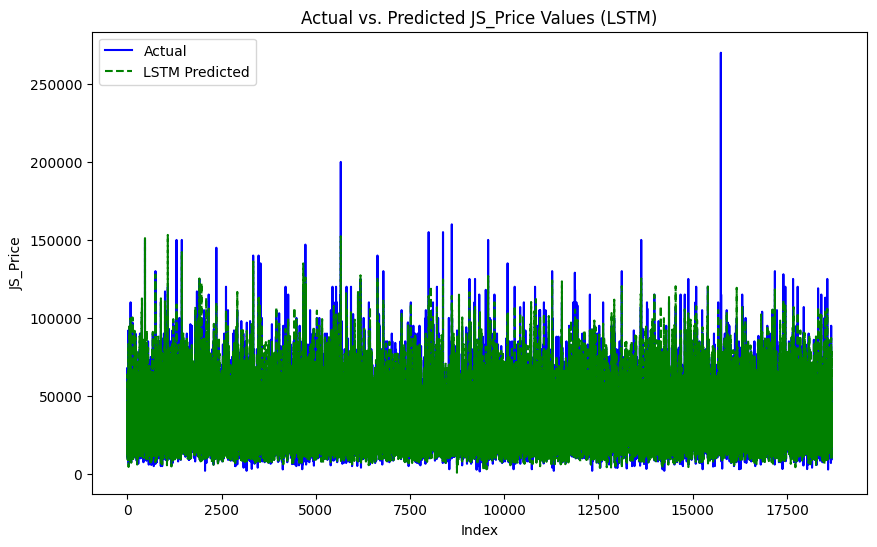

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

data = data_APT

# Prepare input features (X) and target variable (y)
X = data.drop(columns=['JS_Price'])
y = data['JS_Price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model_lstm = keras.Sequential([
    keras.layers.LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    keras.layers.LSTM(50, activation='relu', return_sequences=True),
    keras.layers.LSTM(50, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='mse')

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the LSTM model with early stopping
history = model_lstm.fit(X_train_lstm, y_train, epochs=500, verbose=1, validation_data=(X_test_lstm, y_test), callbacks=[early_stopping])

# Make predictions using the LSTM model
y_pred_lstm = model_lstm.predict(X_test_lstm)
# Calculate MAE for LSTM
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print("LSTM MAE:", mae_lstm)

# Calculate RMSE for LSTM
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
print("LSTM RMSE:", rmse_lstm)

# Calculate MAPE for LSTM
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)
print("LSTM MAPE:", mape_lstm)

# Calculate R-squared (R2) for LSTM
r2_lstm = r2_score(y_test, y_pred_lstm)
print("LSTM R2:", r2_lstm)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_lstm, label='LSTM Predicted', linestyle='--', color='green')
plt.xlabel('Index')
plt.ylabel('JS_Price')
plt.title('Actual vs. Predicted JS_Price Values (LSTM)')
plt.legend()
plt.show()


In [ ]:
# Save the trained model to a file
model.save("APT_ANN.h5")

# Print a message to confirm the model is saved
print("Model saved to disk.")

# Load the saved model
loaded_model = tf.keras.models.load_model("APT_ANN.h5")

# Define the new data you want to make predictions on as a dictionary
new_features_dict = {
    "Building_Age": ,
    "JS_BA": ,
    "Population": ,
    "UR": ,
    "LC_index": ,
    "CA_index": ,  # Add the values for the remaining features here
    "TC_index": ,
    "SDT_index": ,
    "HSP_index": ,
    "Sell_Price": ,
    "Crime_Rates": ,
    "IR": ,
    "Shortest_Distance_to_Subway": ,
    "Shortest_Distance_to_University": ,
    "Shortest_Distance_to_School":
}

# Create a DataFrame from the new data
new_data = pd.DataFrame([new_features_dict])

# Standardize the new data using the same scaler used for training
new_data = scaler.transform(new_data)

# Predict using the loaded model
predictions = loaded_model.predict(new_data)

# The 'predictions' variable now contains the model's predictions for the "JS_Price" of the new data
print('Predicted JS_Price:', predictions[0][0])